# NETHERLANDS EDA AND MULTIVARIATE REGRESSION MODEL

Dataset  contains the data with relevant information of the Covid cases and other features of each country over the period on COVID-19 outbreak.

Data is taken from https://ourworldindata.org/coronavirus-source-data

Main Goal of the Project:
Try to estimate throughout time for a given region :
- Number of active cases.


This notebook contains the EDA and multivariate regression model for the country Netherlands

# Importing the required *libraries*


In [ ]:

!pip install dash
!pip install plotly

!pip install dash_bootstrap_components
import dash
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import plotly.io as pio
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
%matplotlib inline

# Reading the dataset

In [ ]:
df=pd.read_csv("owid-covid-data.csv")

# Understanding the data

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


Creating a separate dataframe for the NetherLands data

In [ ]:
df_netherlands=df[df["location"]=="Netherlands"]

In [ ]:
df_netherlands.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34012,NLD,Europe,Netherlands,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17134873.0,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.931
34013,NLD,Europe,Netherlands,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17134873.0,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.931
34014,NLD,Europe,Netherlands,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17134873.0,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.931
34015,NLD,Europe,Netherlands,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17134873.0,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.931
34016,NLD,Europe,Netherlands,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17134873.0,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,82.28,0.931


In [ ]:
df_netherlands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34012 to 34301
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         290 non-null    object 
 1   continent                        290 non-null    object 
 2   location                         290 non-null    object 
 3   date                             290 non-null    object 
 4   total_cases                      290 non-null    float64
 5   new_cases                        290 non-null    float64
 6   new_cases_smoothed               284 non-null    float64
 7   total_deaths                     290 non-null    float64
 8   new_deaths                       290 non-null    float64
 9   new_deaths_smoothed              284 non-null    float64
 10  total_cases_per_million          290 non-null    float64
 11  new_cases_per_million            290 non-null    float64
 12  new_cases_smooth

In [ ]:
features_with_na=[features for features in df_netherlands.columns if df_netherlands[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df_netherlands[feature].isnull().mean(), 4)*100,  ' % missing values')

new_cases_smoothed 2.07  % missing values
new_deaths_smoothed 2.07  % missing values
new_cases_smoothed_per_million 2.07  % missing values
new_deaths_smoothed_per_million 2.07  % missing values
new_tests 100.0  % missing values
total_tests 89.31  % missing values
total_tests_per_thousand 89.31  % missing values
new_tests_per_thousand 100.0  % missing values
new_tests_smoothed 29.659999999999997  % missing values
new_tests_smoothed_per_thousand 29.659999999999997  % missing values
tests_per_case 29.659999999999997  % missing values
positive_rate 29.659999999999997  % missing values
tests_units 27.24  % missing values
stringency_index 2.76  % missing values
extreme_poverty 100.0  % missing values
handwashing_facilities 100.0  % missing values


# Cleaning the dataset

Dropping the columns having maximum number of missing values

In [ ]:
df_netherlands.drop(columns=["new_tests","new_tests_per_thousand","extreme_poverty","handwashing_facilities","total_tests","total_tests_per_thousand"],inplace=True)

In [ ]:
df_netherlands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34012 to 34301
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         290 non-null    object 
 1   continent                        290 non-null    object 
 2   location                         290 non-null    object 
 3   date                             290 non-null    object 
 4   total_cases                      290 non-null    float64
 5   new_cases                        290 non-null    float64
 6   new_cases_smoothed               284 non-null    float64
 7   total_deaths                     290 non-null    float64
 8   new_deaths                       290 non-null    float64
 9   new_deaths_smoothed              284 non-null    float64
 10  total_cases_per_million          290 non-null    float64
 11  new_cases_per_million            290 non-null    float64
 12  new_cases_smooth

Converting the Date column which is of the type object to the "datetime" datatype

In [ ]:
df_netherlands['date'] =  pd.to_datetime(df_netherlands['date'], infer_datetime_format=True)


In [ ]:
df_netherlands["date"]

34012   2019-12-31
34013   2020-01-01
34014   2020-01-02
34015   2020-01-03
34016   2020-01-04
           ...    
34297   2020-10-11
34298   2020-10-12
34299   2020-10-13
34300   2020-10-14
34301   2020-10-15
Name: date, Length: 290, dtype: datetime64[ns]

Creating a separate column for month

In [ ]:
df_netherlands['month'] = df_netherlands['date'].dt.month


In [ ]:
df_netherlands['month']

34012    12
34013     1
34014     1
34015     1
34016     1
         ..
34297    10
34298    10
34299    10
34300    10
34301    10
Name: month, Length: 290, dtype: int64

In [ ]:
df_netherlands.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,month
34012,NLD,Europe,Netherlands,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,12
34013,NLD,Europe,Netherlands,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1
34014,NLD,Europe,Netherlands,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1
34015,NLD,Europe,Netherlands,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1
34016,NLD,Europe,Netherlands,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1


Displaying the unique values for the column test_units which is of type object

In [ ]:
df_netherlands["tests_units"].unique()

array([nan, 'people tested'], dtype=object)

Performing one hot encoding on the column tests_units where nan=0 and people tested=1

In [ ]:
one_hot_encoded_training_predictors = pd.get_dummies(df_netherlands["tests_units"])

In [ ]:
df_netherlands["Test units"]=one_hot_encoded_training_predictors

In [ ]:
df_netherlands[["tests_units","Test units"]]

,tests_units,Test units
34012,NaN,0
34013,NaN,0
34014,NaN,0
34015,NaN,0
34016,NaN,0
...,...,...
34297,people tested,1
34298,NaN,0
34299,NaN,0
34300,NaN,0


Dropping the tests_units column

In [ ]:
df_netherlands.drop(columns=["tests_units"],inplace=True)

In [ ]:
df_netherlands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34012 to 34301
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         290 non-null    object        
 1   continent                        290 non-null    object        
 2   location                         290 non-null    object        
 3   date                             290 non-null    datetime64[ns]
 4   total_cases                      290 non-null    float64       
 5   new_cases                        290 non-null    float64       
 6   new_cases_smoothed               284 non-null    float64       
 7   total_deaths                     290 non-null    float64       
 8   new_deaths                       290 non-null    float64       
 9   new_deaths_smoothed              284 non-null    float64       
 10  total_cases_per_million          290 non-null    float64

Filling the missing values with mean and median




If the variable is normally distributed :  the mean and median are approximately the same.


Columns in which missing values are replaced by mean :
new_cases_smoothed,
new_deaths_smoothed,
new_cases_smoothed_per_million,
new_deaths_smoothed_per_million,
new_tests_smoothed,
new_tests_smoothed_per_thousand


If the variable is skewed : the median is a better representation of the majority of the values in the variable. (The mean is biased by the values at the far end of the distribution)
Columns in which missing values are replaced by median :
positive_rate,
stringency_index


In [ ]:
df_netherlands['new_cases_smoothed'] = df_netherlands['new_cases_smoothed'].fillna(df_netherlands['new_cases_smoothed'].mean())
df_netherlands['new_deaths_smoothed'] = df_netherlands['new_deaths_smoothed'].fillna(df_netherlands['new_deaths_smoothed'].mean())
df_netherlands['new_cases_smoothed_per_million'] = df_netherlands['new_cases_smoothed_per_million'].fillna(df_netherlands['new_cases_smoothed_per_million'].mean())
df_netherlands['new_deaths_smoothed_per_million'] = df_netherlands['new_deaths_smoothed_per_million'].fillna(df_netherlands['new_deaths_smoothed_per_million'].mean())
df_netherlands['new_tests_smoothed'] = df_netherlands['new_tests_smoothed'].fillna(df_netherlands['new_tests_smoothed'].mean())
df_netherlands['new_tests_smoothed_per_thousand'] = df_netherlands['new_tests_smoothed_per_thousand'].fillna(df_netherlands['new_tests_smoothed_per_thousand'].mean())
df_netherlands['tests_per_case'] = df_netherlands['tests_per_case'].fillna(df_netherlands['tests_per_case'].mean())
df_netherlands['positive_rate'] = df_netherlands['positive_rate'].fillna(df_netherlands['positive_rate'].median())
df_netherlands['stringency_index'] = df_netherlands['stringency_index'].fillna(df_netherlands['stringency_index'].median())

In [ ]:
df_netherlands.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
c

All the missing values are handled

In [ ]:
df_netherlands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34012 to 34301
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         290 non-null    object        
 1   continent                        290 non-null    object        
 2   location                         290 non-null    object        
 3   date                             290 non-null    datetime64[ns]
 4   total_cases                      290 non-null    float64       
 5   new_cases                        290 non-null    float64       
 6   new_cases_smoothed               290 non-null    float64       
 7   total_deaths                     290 non-null    float64       
 8   new_deaths                       290 non-null    float64       
 9   new_deaths_smoothed              290 non-null    float64       
 10  total_cases_per_million          290 non-null    float64

Calculating the number of beds available

In [ ]:
df_netherlands['beds_available'] = (df_netherlands['population']/1000)*df_netherlands['hospital_beds_per_thousand']

Calculating the recovered cases

In [ ]:
df_netherlands['recovered_cases'] = df_netherlands['total_cases']-df_netherlands['total_deaths'] - df_netherlands['new_cases']
#active = confirmed — deaths — recovered

In [ ]:
df_netherlands['recovered_cases']

34012         0.0
34013         0.0
34014         0.0
34015         0.0
34016         0.0
           ...   
34297    155031.0
34298    161507.0
34299    167863.0
34300    174672.0
34301    182008.0
Name: recovered_cases, Length: 290, dtype: float64

# Standardising the data

Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

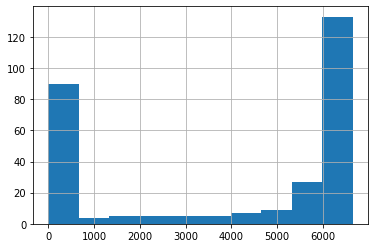

In [ ]:
df_netherlands["total_deaths"].hist()

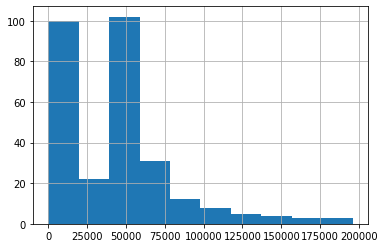

In [ ]:
df_netherlands["total_cases"].hist()

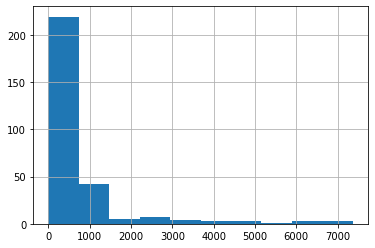

In [ ]:
df_netherlands["new_cases"].hist()

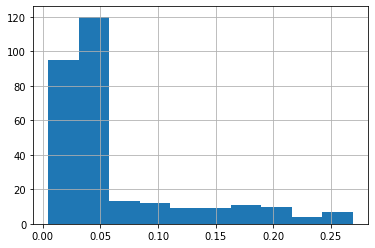

In [ ]:
df_netherlands["positive_rate"].hist()

For positive rate which is right skewed data applying exponential transformation



In [ ]:
df_netherlands['positive_rate'] = df_netherlands['positive_rate'] **(1/5)

Standardizing the values from 0 to 1

In [ ]:

df_netherlands[['total_cases', 'new_cases','new_cases_smoothed', 'total_deaths', 'new_deaths','recovered_cases','stringency_index','positive_rate','tests_per_case']] = scaler.fit_transform(df_netherlands[['total_cases', 'new_cases','new_cases_smoothed', 'total_deaths', 'new_deaths','recovered_cases','stringency_index','positive_rate','tests_per_case']])

We have standardised the "total_cases" values from 0 to 1

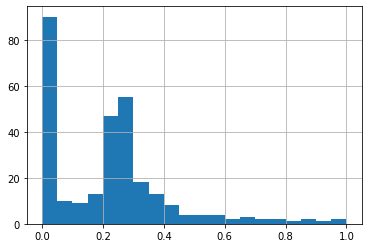

In [ ]:
df_netherlands["total_cases"].hist(bins=20,)

In [ ]:
df_netherlands.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,month,Test units,beds_available,recovered_cases
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,290.000000,290.000000,2.900000e+02,290.000000
mean,0.214063,0.091698,0.093582,0.578107,0.098055,23.165475,2447.760321,39.430155,35.980377,224.496614,1.339069,1.351926,13514.102941,0.788716,0.195341,0.428609,0.547896,17134873.0,5.085440e+02,4.320000e+01,1.877900e+01,1.188100e+01,4.847254e+04,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,3.320000e+00,8.228000e+01,9.310000e-01,5.289655,0.727586,5.688778e+04,0.205594
std,0.200165,0.169271,0.159889,0.417773,0.185971,40.968840,2288.840054,72.786595,61.474083,162.234086,2.539655,2.390976,7756.227368,0.452672,0.189724,0.241599,0.347660,0.0,2.619317e-12,1.637073e-13,1.103245e-13,3.736798e-14,6.559681e-11,5.551814e-13,2.135313e-14,1.138834e-13,1.245599e-13,2.046342e-14,1.565896e-13,3.781283e-15,2.773870,0.445971,1.020395e-10,0.197749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3048.000000,0.178000,0.000000,0.000000,0.000000,17134873.0,5.085440e+02,4.320000e+01,1.877900e+01,1.188100e+01,4.847254e+04,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,3.320000e+00,8.228000e+01,9.310000e-01,1.000000,0.000000,5.688778e+04,0.000000
25%,0.002709,0.007058,0.009422,0.000751,0.000000,0.143000,30.974500,3.035000,3.622250,0.292000,0.000000,0.008000,5991.000000,0.349500,0.057857,0.282939,0.499937,17134873.0,5.085440e+02,4.320000e+01,1.877900e+01,1.188100e+01,4.847254e+04,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,3.320000e+00,8.228000e+01,9.310000e-01,3.000000,0.000000,5.688778e+04,0.002238
50%,0.229548,0.026941,0.029513,0.871581,0.012821,3.143000,2624.822500,11.584500,11.347000,338.462000,0.175000,0.183000,13514.102941,0.788716,0.195341,0.390299,0.592993,17134873.0,5.085440e+02,4.320000e+01,1.877900e+01,1.188100e+01,4.847254e+04,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,3.320000e+00,8.228000e+01,9.310000e-01,5.000000,1.000000,5.688778e+04,0.214246
75%,0.282352,0.098229,0.096111,0.922753,0.076923,20.143000,3228.620500,42.238500,36.953000,358.334000,1.050000,1.176000,16910.000000,0.987000,0.196690,0.535871,0.860480,17134873.0,5.085440e+02,4.320000e+01,1.877900e+01,1.188100e+01,4.847254e+04,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,3.320000e+00,8.228000e+01,9.310000e-01,8.000000,1.000000,5.688778e+04,0.268259
max,1.000000,1.000000,1.000000,1.000000,1.000000,153.571000,11434.751000,430.000000,384.479000,388.331000,13.656000,8.963000,29948.000000,1.748000,1.000000,1.000000,1.000000,17134873.0,5.085440e+02,4.320000e+01,1.877900e+01,1.188100e+01,4.847254e+04,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,3.320000e+00,8.228000e+01,9.310000e-01,12.000000,1.000000,5.688778e+04,1.000000


##### To find the time series range of data

In [ ]:
print("Starting date-",df_netherlands['date'].min())
print("End date-",df_netherlands['date'].max())
print("Length of data with respect to days :",(df_netherlands['date'].max() - df_netherlands['date'].min()))

Starting date- 2019-12-31 00:00:00
End date- 2020-10-15 00:00:00
Length of data with respect to days : 289 days 00:00:00


In [ ]:
s=['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million','new_tests_smoothed','stringency_index',
       'new_tests_smoothed_per_thousand','tests_per_case','positive_rate',
       'recovered_cases']

#### Knowing the correlation of variables

In [ ]:
df_netherlands[s].corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests_smoothed,stringency_index,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,recovered_cases
total_cases,1.000000,0.797113,0.789040,0.808373,-0.094346,-0.097329,1.000000,0.797113,0.789040,0.808373,-0.094331,-0.097330,0.541852,0.376281,0.541895,-0.025261,-0.019915,0.999606
new_cases,0.797113,1.000000,0.991736,0.323512,0.137810,0.110535,0.797113,1.000000,0.991736,0.323512,0.137830,0.110545,0.426823,0.237272,0.426867,-0.308384,0.381768,0.808946
new_cases_smoothed,0.789040,0.991736,1.000000,0.319938,0.177117,0.162372,0.789040,0.991736,1.000000,0.319938,0.177136,0.162382,0.401075,0.254698,0.401119,-0.328317,0.407649,0.800711
total_deaths,0.808373,0.323512,0.319938,1.000000,-0.088906,-0.059808,0.808373,0.323512,0.319938,1.000000,-0.088902,-0.059819,0.270685,0.546174,0.270710,0.195048,-0.264502,0.792408
new_deaths,-0.094346,0.137810,0.177117,-0.088906,1.000000,0.931550,-0.094346,0.137810,0.177117,-0.088906,1.000000,0.931554,-0.477565,0.599206,-0.477592,-0.450305,0.766589,-0.100714
new_deaths_smoothed,-0.097329,0.110535,0.162372,-0.059808,0.931550,1.000000,-0.097329,0.110535,0.162372,-0.059809,0.931549,1.000000,-0.514378,0.619547,-0.514403,-0.465741,0.770497,-0.105267
total_cases_per_million,1.000000,0.797113,0.789040,0.808373,-0.094346,-0.097329,1.000000,0.797113,0.789040,0.808373,-0.094331,-0.097330,0.541852,0.376281,0.541895,-0.025261,-0.019915,0.999606
new_cases_per_million,0.797113,1.000000,0.991736,0.323512,0.137810,0.110535,0.797113,1.000000,0.991736,0.323512,0.137830,0.110545,0.426824,0.237271,0.426868,-0.308384,0.381768,0.808946
new_cases_smoothed_per_million,0.789040,0.991736,1.000000,0.319938,0.177117,0.162372,0.789040,0.991736,1.000000,0.319938,0.177136,0.162381,0.401076,0.254698,0.401119,-0.328317,0.407648,0.800712
total_deaths_per_million,0.808373,0.323512,0.319938,1.000000,-0.088906,-0.059809,0.808373,0.323512,0.319938,1.000000,-0.088902,-0.059819,0.270685,0.546174,0.270710,0.195048,-0.264502,0.792408


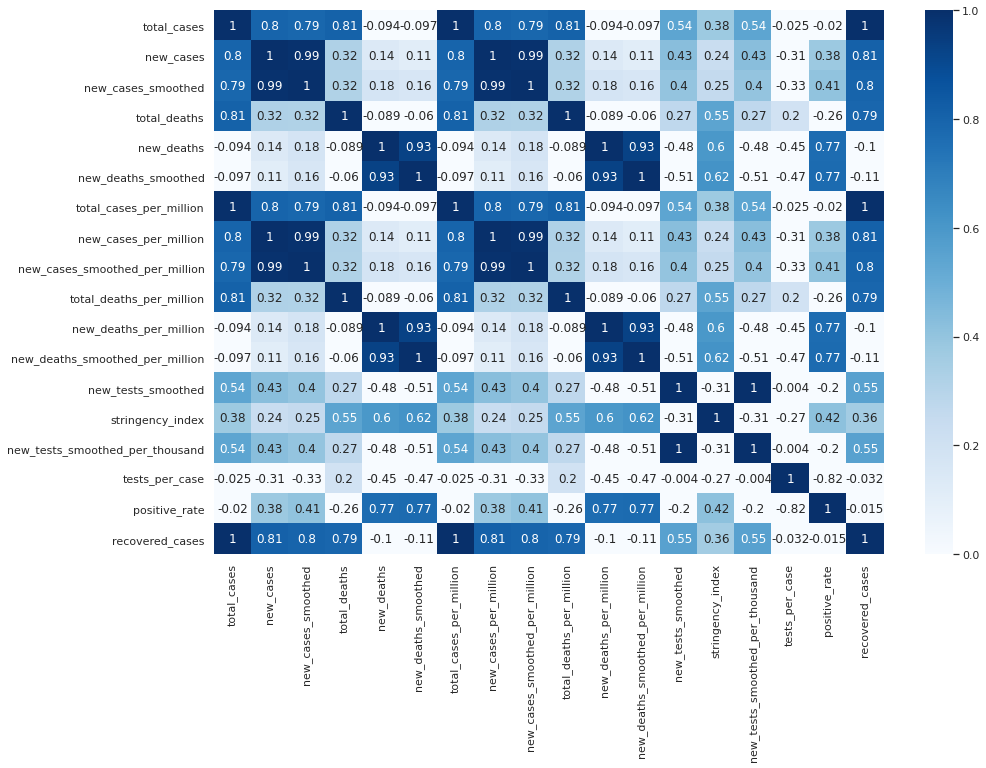

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_netherlands[s].corr(), vmin=0, vmax=1,annot=True,cmap="Blues")


#### Knowing the collinearity of variables

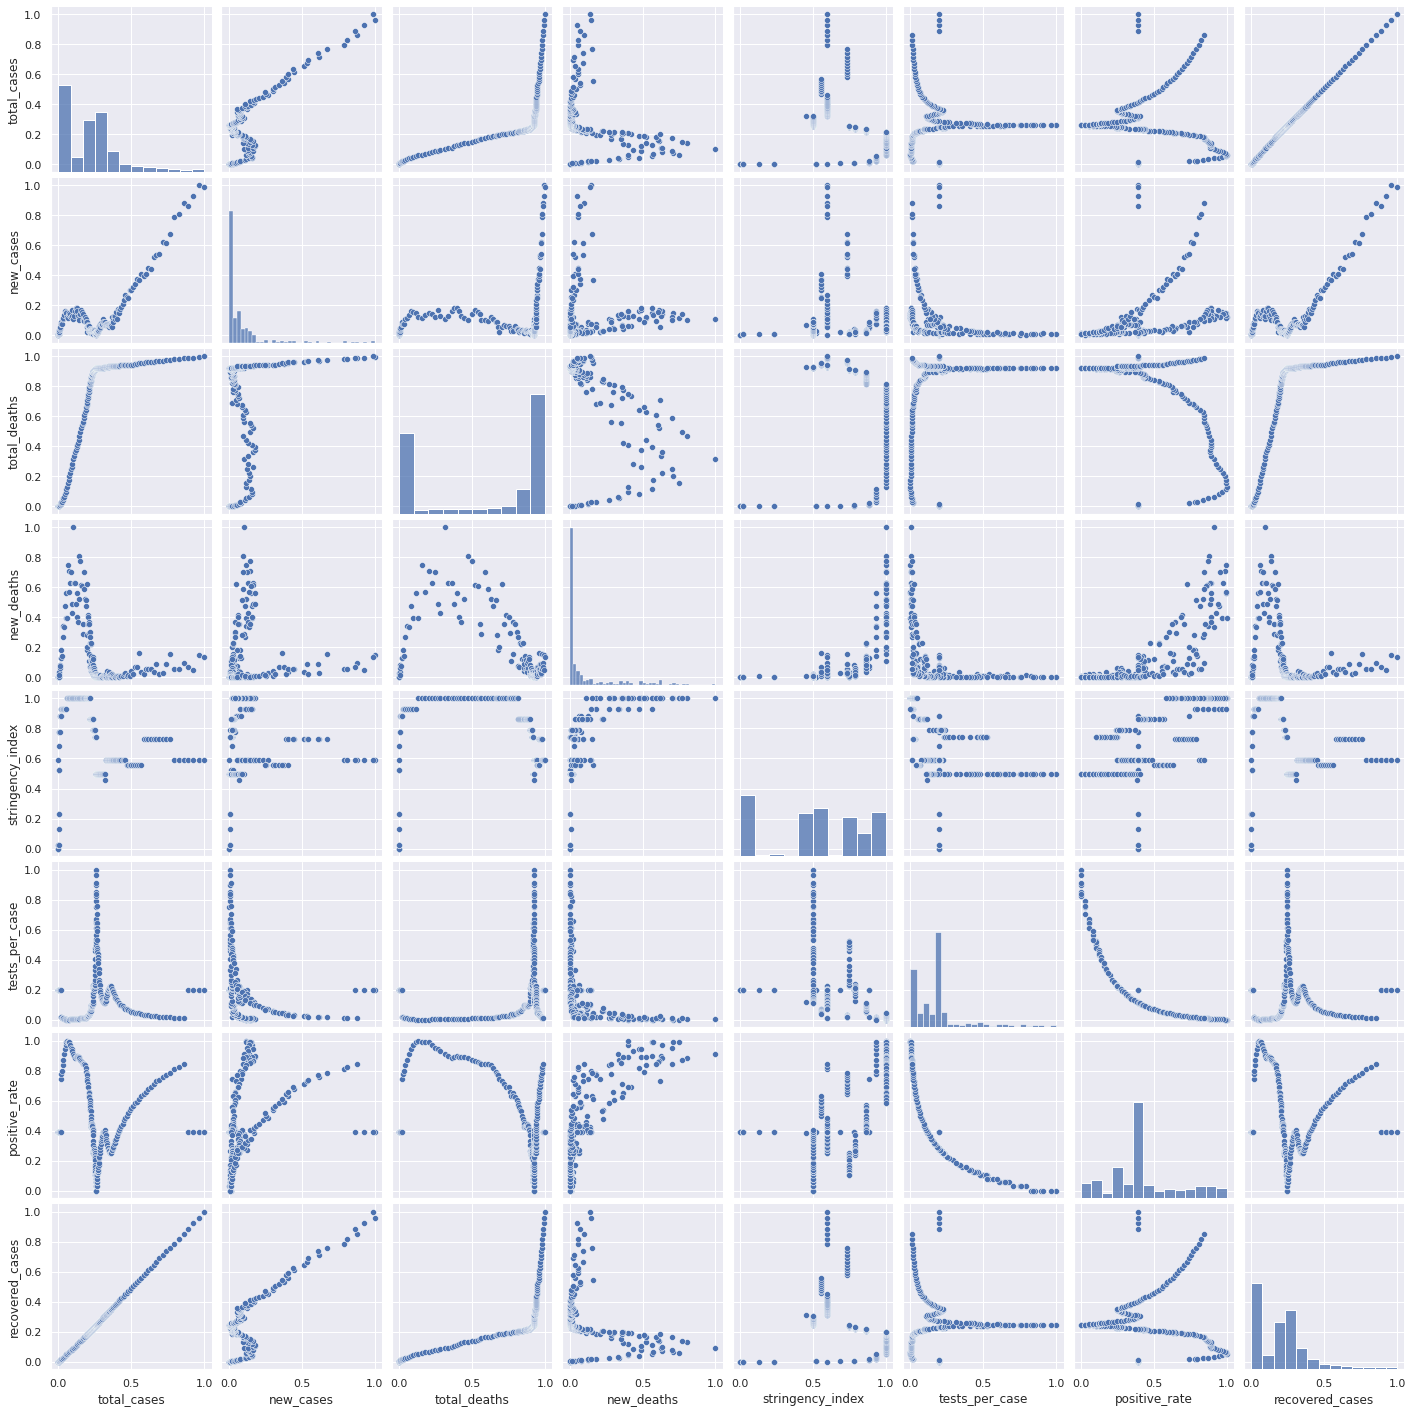

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.pairplot(df_netherlands[['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
        'stringency_index',
       'tests_per_case','positive_rate',
       'recovered_cases']])

Plot of total_cases vs new_cases is linear

In [ ]:
df_netherlands.head(30)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,month,Test units,beds_available,recovered_cases
34012,NLD,Europe,Netherlands,2019-12-31,0.0,0.0,0.093582,0.0,0.0,23.165475,0.0,0.0,35.980377,0.0,0.0,1.351926,13514.102941,0.788716,0.195341,0.390299,0.592993,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,12,0,56887.77836,0.0
34013,NLD,Europe,Netherlands,2020-01-01,0.0,0.0,0.093582,0.0,0.0,23.165475,0.0,0.0,35.980377,0.0,0.0,1.351926,13514.102941,0.788716,0.195341,0.390299,0.000000,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1,0,56887.77836,0.0
34014,NLD,Europe,Netherlands,2020-01-02,0.0,0.0,0.093582,0.0,0.0,23.165475,0.0,0.0,35.980377,0.0,0.0,1.351926,13514.102941,0.788716,0.195341,0.390299,0.000000,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1,0,56887.77836,0.0
34015,NLD,Europe,Netherlands,2020-01-03,0.0,0.0,0.093582,0.0,0.0,23.165475,0.0,0.0,35.980377,0.0,0.0,1.351926,13514.102941,0.788716,0.195341,0.390299,0.000000,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1,0,56887.77836,0.0
34016,NLD,Europe,Netherlands,2020-01-04,0.0,0.0,0.093582,0.0,0.0,23.165475,0.0,0.0,35.980377,0.0,0.0,1.351926,13514.102941,0.788716,0.195341,0.390299,0.000000,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1,0,56887.77836,0.0
34017,NLD,Europe,Netherlands,2020-01-05,0.0,0.0,0.093582,0.0,0.0,23.165475,0.0,0.0,35.980377,0.0,0.0,1.351926,13514.102941,0.788716,0.195341,0.390299,0.000000,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1,0,56887.77836,0.0
34018,NLD,Europe,Netherlands,2020-01-06,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,13514.102941,0.788716,0.195341,0.390299,0.000000,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1,0,56887.77836,0.0
34019,NLD,Europe,Netherlands,2020-01-07,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,13514.102941,0.788716,0.195341,0.390299,0.000000,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1,0,56887.77836,0.0
34020,NLD,Europe,Netherlands,2020-01-08,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,13514.102941,0.788716,0.195341,0.390299,0.000000,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1,0,56887.77836,0.0
34021,NLD,Europe,Netherlands,2020-01-09,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,13514.102941,0.788716,0.195341,0.390299,0.000000,17134873.0,508.544,43.2,18.779,11.881,48472.545,109.361,5.29,24.4,27.3,3.32,82.28,0.931,1,0,56887.77836,0.0


# EDA

In [ ]:
fig_line=px.line(data_frame=df_netherlands,x='date',y='total_cases')
fig_line.show()


The plot of total_cases  vs date is exponential (after Sept 2020)

In [ ]:
fig_line=px.line(data_frame=df_netherlands,x='date',y='total_deaths')
fig_line.show()


The plot shows steep increase from mid April 2020 to June 2020

In [ ]:
df_netherlands["stringency_index"].unique()

array([0.59299259, 0.        , 0.02323245, 0.12796685, 0.23257566,
       0.52329524, 0.68604797, 0.77910335, 0.88371217, 0.93017707,
       1.        , 0.86047972, 0.79065679, 0.74419189, 0.49993721,
       0.45347231, 0.55808113, 0.73251287])

This is a composite measure based on nine response indicators including school closures, workplace
closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest). If policies vary at the subnational
level, the index is shown as the response level of the strictest sub-region.

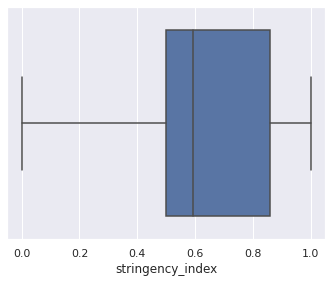

In [ ]:
sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.boxplot(x="stringency_index",data=df_netherlands)

Strigency index ranges from 0 to 1

In [ ]:
fig_line=px.line(data_frame=df_netherlands,x='date',y='total_cases_per_million')
fig_line.show()

The plot show linear increase from April 2020 to May 2020 and then exponential increase is seen after Sept 2020

In [ ]:
fig_line=px.line(data_frame=df_netherlands,x='total_deaths',y='total_cases')
fig_line.show()

Initially the plot shows a gradual increase and then there is a steep increase in the total_deaths

In [ ]:
fig_line=px.line(data_frame=df_netherlands,x='total_cases',y='recovered_cases')
fig_line.show()

There is a linear relationship between total_cases and recovered_cases

In [ ]:
df_grouped_by_month = df_netherlands.groupby(df_netherlands.month).sum()
df_grouped_by_month = df_grouped_by_month.sort_values(by = ['total_cases', 'month'], ascending = [True, False])

In [ ]:
fig_bar=px.bar(data_frame=df_netherlands,x='month',y='new_deaths')
fig_bar.show()

Maximum deaths were seen in the month of April 2020

In [ ]:
fig_bar=px.bar(data_frame=df_netherlands,x='month',y='positive_rate')
fig_bar.show()

Normal dstribution of poitive_rate is seen between Jan 2020 to June 2020

In [ ]:
fig_bar=px.bar(data_frame=df_netherlands,x='month',y='new_cases')
fig_bar.show()

Maximum new_cases were seen in October 2020

In [ ]:
fig_bar=px.bar(data_frame=df_netherlands,x='month',y='stringency_index')
fig_bar.show()

The following plot shows the variation of stringency_index wrt months

In [ ]:
fig_bar=px.bar(data_frame=df_netherlands,x='month',y='total_cases')
fig_bar.show()

A gradual increase in total_cases is seen wrt months

# Feature Selection

In [ ]:
s=['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million','new_tests_smoothed','stringency_index',
       'new_tests_smoothed_per_thousand','tests_per_case','positive_rate',
       'recovered_cases']

In [ ]:
df_netherlands[s].corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests_smoothed,stringency_index,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,recovered_cases
total_cases,1.000000,0.797113,0.789040,0.808373,-0.094346,-0.097329,1.000000,0.797113,0.789040,0.808373,-0.094331,-0.097330,0.541852,0.376281,0.541895,-0.025261,-0.019915,0.999606
new_cases,0.797113,1.000000,0.991736,0.323512,0.137810,0.110535,0.797113,1.000000,0.991736,0.323512,0.137830,0.110545,0.426823,0.237272,0.426867,-0.308384,0.381768,0.808946
new_cases_smoothed,0.789040,0.991736,1.000000,0.319938,0.177117,0.162372,0.789040,0.991736,1.000000,0.319938,0.177136,0.162382,0.401075,0.254698,0.401119,-0.328317,0.407649,0.800711
total_deaths,0.808373,0.323512,0.319938,1.000000,-0.088906,-0.059808,0.808373,0.323512,0.319938,1.000000,-0.088902,-0.059819,0.270685,0.546174,0.270710,0.195048,-0.264502,0.792408
new_deaths,-0.094346,0.137810,0.177117,-0.088906,1.000000,0.931550,-0.094346,0.137810,0.177117,-0.088906,1.000000,0.931554,-0.477565,0.599206,-0.477592,-0.450305,0.766589,-0.100714
new_deaths_smoothed,-0.097329,0.110535,0.162372,-0.059808,0.931550,1.000000,-0.097329,0.110535,0.162372,-0.059809,0.931549,1.000000,-0.514378,0.619547,-0.514403,-0.465741,0.770497,-0.105267
total_cases_per_million,1.000000,0.797113,0.789040,0.808373,-0.094346,-0.097329,1.000000,0.797113,0.789040,0.808373,-0.094331,-0.097330,0.541852,0.376281,0.541895,-0.025261,-0.019915,0.999606
new_cases_per_million,0.797113,1.000000,0.991736,0.323512,0.137810,0.110535,0.797113,1.000000,0.991736,0.323512,0.137830,0.110545,0.426824,0.237271,0.426868,-0.308384,0.381768,0.808946
new_cases_smoothed_per_million,0.789040,0.991736,1.000000,0.319938,0.177117,0.162372,0.789040,0.991736,1.000000,0.319938,0.177136,0.162381,0.401076,0.254698,0.401119,-0.328317,0.407648,0.800712
total_deaths_per_million,0.808373,0.323512,0.319938,1.000000,-0.088906,-0.059809,0.808373,0.323512,0.319938,1.000000,-0.088902,-0.059819,0.270685,0.546174,0.270710,0.195048,-0.264502,0.792408


Selecting the attributes which are highly correlated with new_cases




In [ ]:
X=df_netherlands[['total_cases','total_deaths','positive_rate','stringency_index','new_tests_smoothed']]
y=df_netherlands[['new_cases']]


Displaying the start and end date for the dataset

In [ ]:
print("Starting date-",df_netherlands['date'].min())
print("End date-",df_netherlands['date'].max())
print("Length of data with respect to days :",(df_netherlands['date'].max() - df_netherlands['date'].min()))

Starting date- 2019-12-31 00:00:00
End date- 2020-10-15 00:00:00
Length of data with respect to days : 289 days 00:00:00


# Splitting the dataset into first and second wave

First wave: 2019-12-31 to 2020-8-31


Second wave: 2020-9-01 to 2020-10-31

In [ ]:
df_first_wave=df_netherlands[ (df_netherlands['month'] != 9 )& ( df_netherlands['month'] != 10 )]

df_second_wave =df_netherlands[(df_netherlands['month'] == 9 )| ( df_netherlands['month'] == 10 )]


#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

# MODEL 1 (FINAL MODEL)

# Training Data

In [ ]:
X1=df_first_wave[['total_cases','total_deaths','positive_rate','stringency_index','new_tests_smoothed']]
y1=df_first_wave[['new_cases']]

# Training the Linear Regression Model with first wave data

Using sklearn package to model data.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm1=LinearRegression()

In [ ]:
lm1.fit(X1,y1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm1.score(X1,y1)


0.8466058549628601

Train Accuracy: 84.66%

# Testing the model with second wave data

In [ ]:
X2=df_second_wave[['total_cases','total_deaths','positive_rate','stringency_index','new_tests_smoothed']]
y2=df_second_wave[['new_cases']]

In [ ]:
predictions1 = lm1.predict(X2)

In [ ]:
lm1.score(X2,y2)

0.8228457123098578

Test Accuracy: 82.28%

Text(0, 0.5, 'Predicted Y')

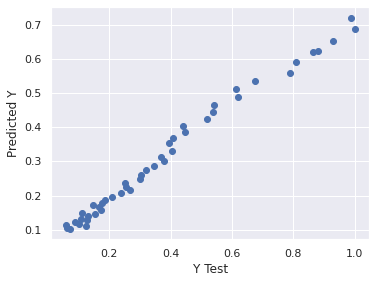

In [ ]:
plt.scatter(y2,predictions1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the model

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 

<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
</ul>


In [ ]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y2, predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(y2, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, predictions1)))

Mean Absolute Error: 0.07756007087972852
Mean Squared Error: 0.013212446627330203
Root Mean Squared Error: 0.11494540716066129


In [ ]:
predictions = predictions1.flatten()

#### Plotting the predictions against date

Text(0, 0.5, 'Predictions')

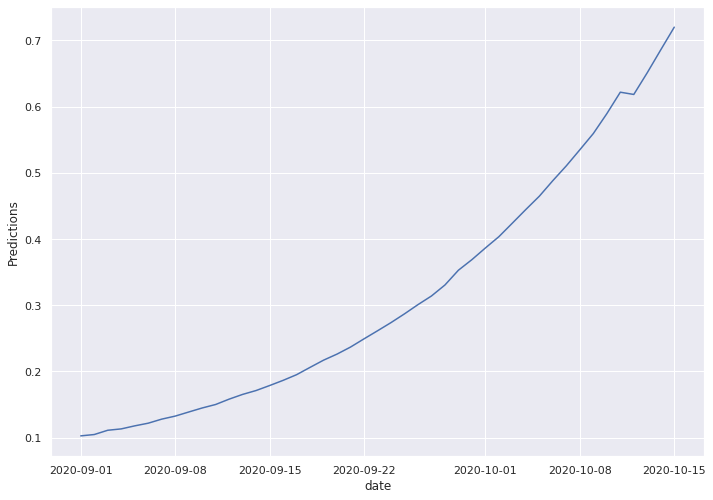

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=df_second_wave['date'],y=predictions).set_ylabel("Predictions")


#### From the above plot it is clear that there is an exponential rise in the number of cases during the second wave

In [ ]:
fig_line=px.line(data_frame=df_second_wave,x='date',y='new_cases')
fig_line.show()

# MODEL 2

In [ ]:
X3=df_first_wave[['total_cases','positive_rate','new_deaths','stringency_index']]
y3=df_first_wave[['new_cases']]

In [ ]:
lm2=LinearRegression()

In [ ]:
lm2.fit(X3,y3)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm2.score(X3,y3)


0.7644321452722017

Train Score: 76.44%

In [ ]:
X4=df_first_wave[['total_cases','new_deaths','positive_rate','stringency_index']]
y4=df_first_wave[['new_cases']]

In [ ]:
predictions1 = lm2.predict(X4)

In [ ]:
lm2.score(X4,y4)

0.46767425135669494

Test score: 46.7%